# **Credit Card Fraud Detection**

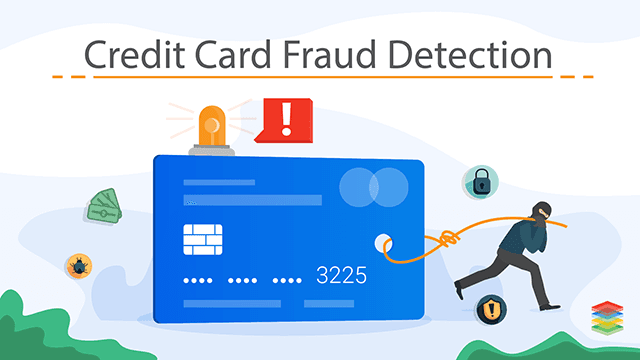

# **About Dataset**

*The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.*

# **Objective**

*Build a machine learning model to identify fraudulent credit card
transactions.*

In [1]:
# Import the needed libraries
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
# Read a csv file
df=pd.read_csv('/content/drive/MyDrive/creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
# Get a quick info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

# **Data Preprocessing Part**

In [5]:
# Detecting the null values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
# Checking the Unique values of Class Column
df['Class'].unique()

array([0, 1])

In [7]:
# Checking the value counts of Class Column
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

# **Data Visualization**

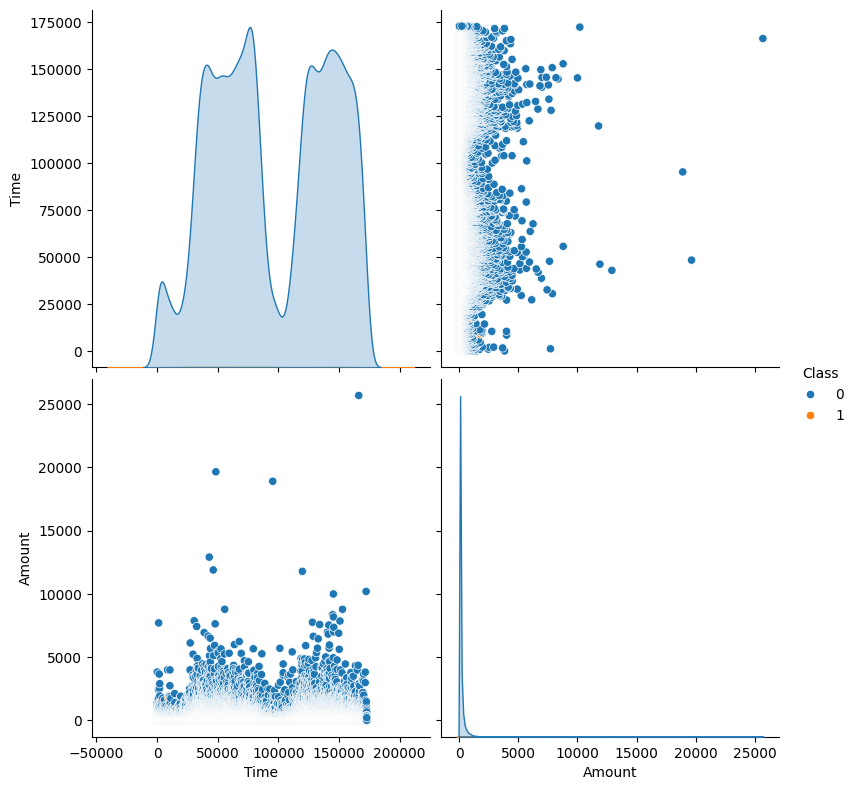

In [8]:
# Relation between Time and Amount
df_refine = df[["Time", "Amount", "Class"]]
sns.pairplot(df_refine, hue="Class", size=4)
plt.show()

**Thus, there are no transactions above 2500 amount which are fraud and this implies that smaller transactions are more prone to fraud in order to prevent raising suspicion.**

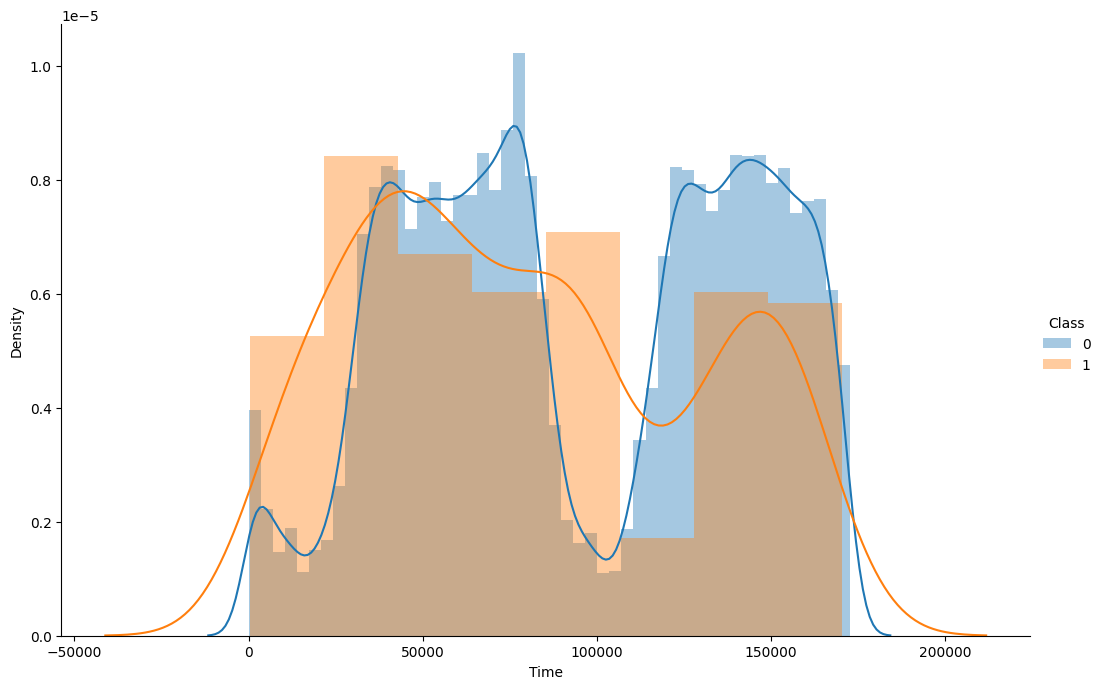

In [9]:
# Relation between Time and Transaction
sns.FacetGrid(df_refine, hue="Class",height=7,aspect=1.5).map(sns.distplot,"Time").add_legend()
plt.show()

**The fraud transactions are equitably distributed throughout time, as evident from the distribution plot above.**

<Axes: >

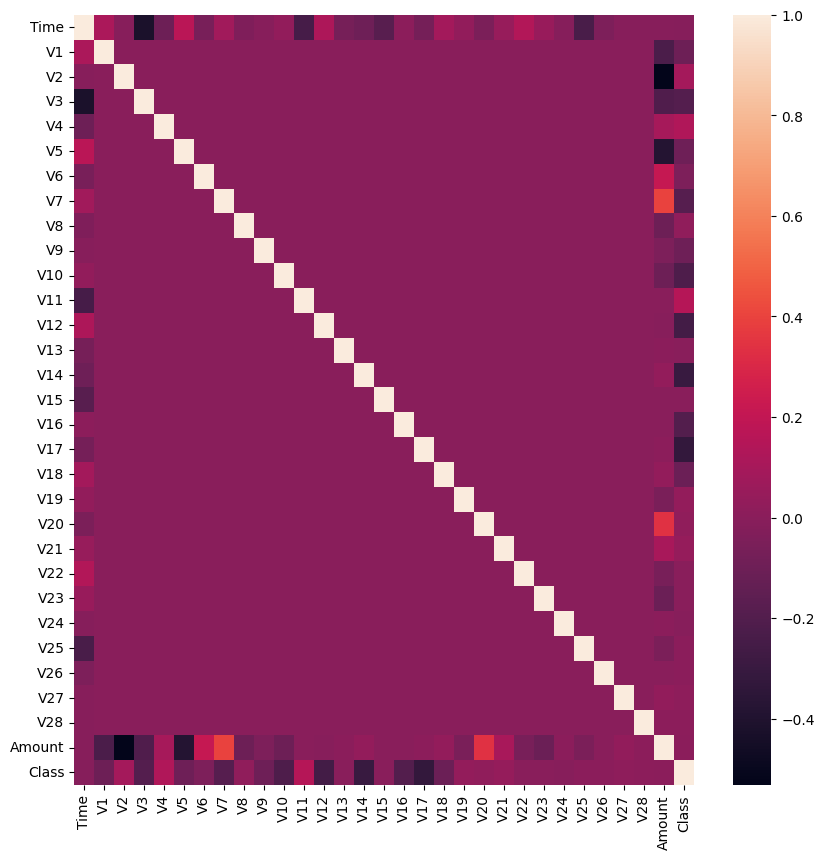

In [10]:
# Heatmap for Correlation of the Dataset
plt.figure(figsize=(10,10))
corr = df.corr()
sns.heatmap(corr)

In [11]:
# Separate the dataset into features(x) and target(y)
x=df.drop(['Class'],axis=1)
y=df['Class']

In [12]:
# Checking the Shape of features(x) and target(y) Column
x.shape,y.shape

((284807, 30), (284807,))

## **Oversampling**

In [13]:
# Doing Oversampling for the Dataset due to the Imbalance of Data
from imblearn.over_sampling import SMOTE
smote = SMOTE(
      sampling_strategy='auto',
      random_state = 0,
      k_neighbors = 3
)
x_new,y_new = smote.fit_resample(x,y)

In [14]:
# Checking the Shape of features(x) and target(y) Column after Oversampling
x_new.shape,y_new.shape

((568630, 30), (568630,))

# **Train Test Split**

In [15]:
x_train,X_test,y_train,y_test = train_test_split(x_new,y_new,test_size=0.2,random_state=42)

# **Model Evaluation**

In [16]:
# Applying LogisticRegression Algorithm
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [17]:
y_pred = model.predict(X_test)
y_pred

array([1, 1, 0, ..., 1, 1, 0])

In [18]:
# Checking Accuracy of the Model
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.9588924256546436

In [19]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test,y_pred)
confusion

array([[54895,  1855],
       [ 2820, 54156]])

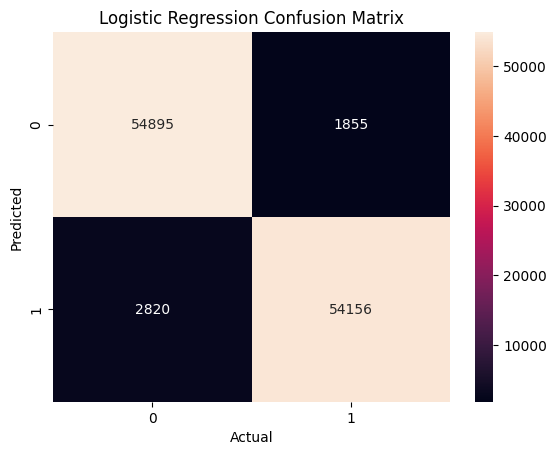

In [28]:
# HeatMap for Confusion Matrix
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='.0f').set(title='Logistic Regression Confusion Matrix',xlabel='Actual',ylabel='Predicted')
plt.show()

In [21]:
# Checking Classification report of the Model to check Precision and Recall
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.95      0.97      0.96     56750
           1       0.97      0.95      0.96     56976

    accuracy                           0.96    113726
   macro avg       0.96      0.96      0.96    113726
weighted avg       0.96      0.96      0.96    113726



In [22]:
# Applying RandomForestClassifier Algorithm
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier()
model1.fit(x_train, y_train)

RandomForestClassifier()

In [23]:
y_pred1= model1.predict(X_test)
y_pred1

array([1, 1, 0, ..., 1, 1, 0])

In [24]:
# Checking Accuracy of the Model
accuracy = accuracy_score(y_test,y_pred1)
accuracy

0.999903276295658

In [25]:
# Confusion Matrix
confusion = confusion_matrix(y_test,y_pred1)
confusion

array([[56739,    11],
       [    0, 56976]])

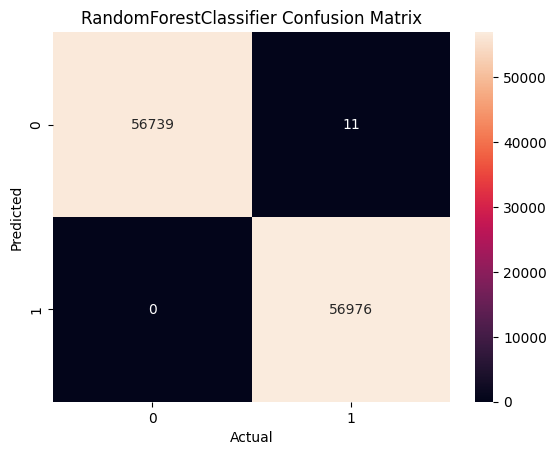

In [29]:
# HeatMap for Confusion Matrix
sns.heatmap(confusion_matrix(y_test,y_pred1),annot=True,fmt='.0f').set(title='RandomForestClassifier Confusion Matrix',xlabel='Actual',ylabel='Predicted')
plt.show()

In [27]:
# Checking Classification report of the Model to check Precision and Recall
cr = classification_report(y_test,y_pred1)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



# **Conclusion**

After evaluating LogisticRegression and RandomForestClassifier on the dataset, it is evident that LogisticRegression outperforms RandomForestClassifier in terms of accuracy, precision, and recall.

So as a result, RandomForestClassifier gives the best accuracy of the model without compromising its efficiency."